In [1]:
path = 'C:\\Users\\rhasan\\Downloads\\Iris.csv'

In [2]:
# import package data manipulation
import numpy as np
import pandas as pd

# visualization package import
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='white', color_codes=True)

In [3]:
# load data
iris = pd.read_csv(path)

In [4]:
# explore data set
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.shape

(150, 6)

In [7]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

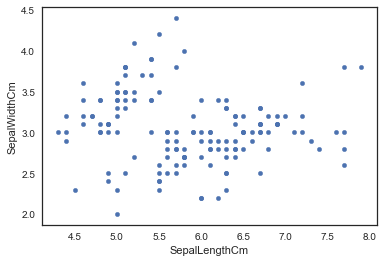

In [8]:
# create some visualization
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
plt.show()

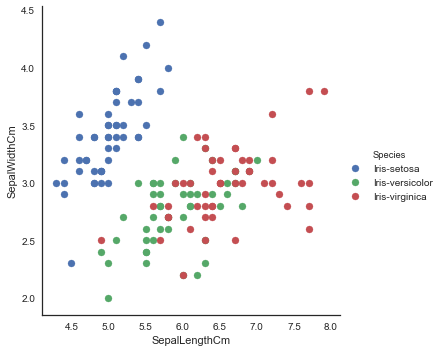

In [9]:
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

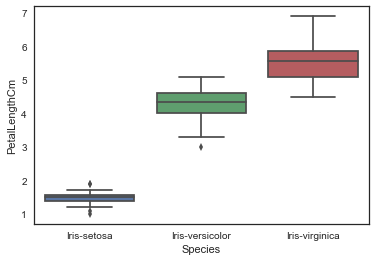

In [10]:
# box plot
sns.boxplot(data=iris, x='Species', y='PetalLengthCm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B5A62E8>,
      dtype=object)

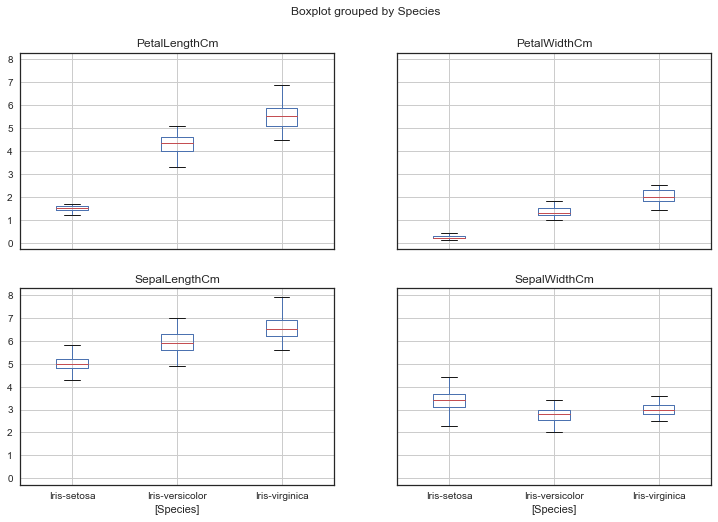

In [11]:
# box plot by feature
iris.drop('Id', axis=1).boxplot(by='Species', figsize=(12, 8))

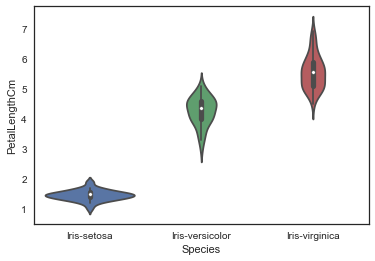

In [12]:
# violin plot
sns.violinplot(data=iris, x='Species', y='PetalLengthCm', size=10)

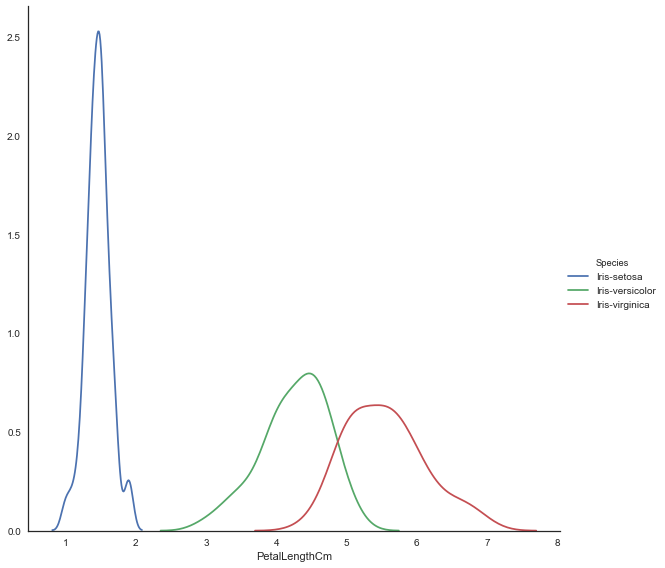

In [13]:
# kde plot
sns.FacetGrid(iris, hue='Species', size=8).map(sns.kdeplot, 'PetalLengthCm').add_legend()

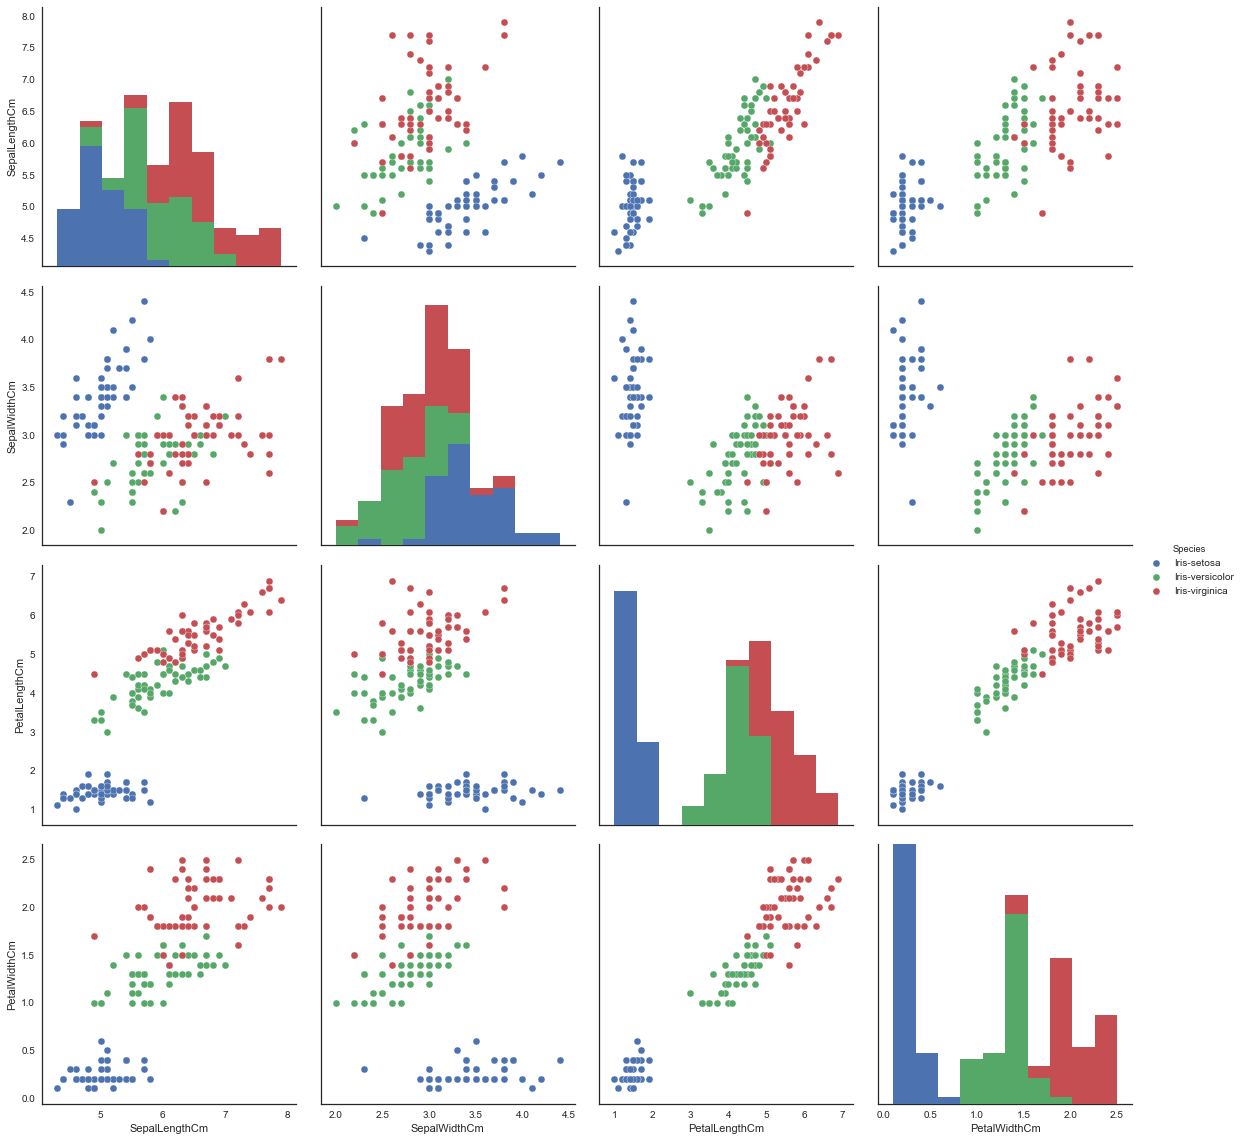

In [14]:
# pair plot - drop id
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=4)

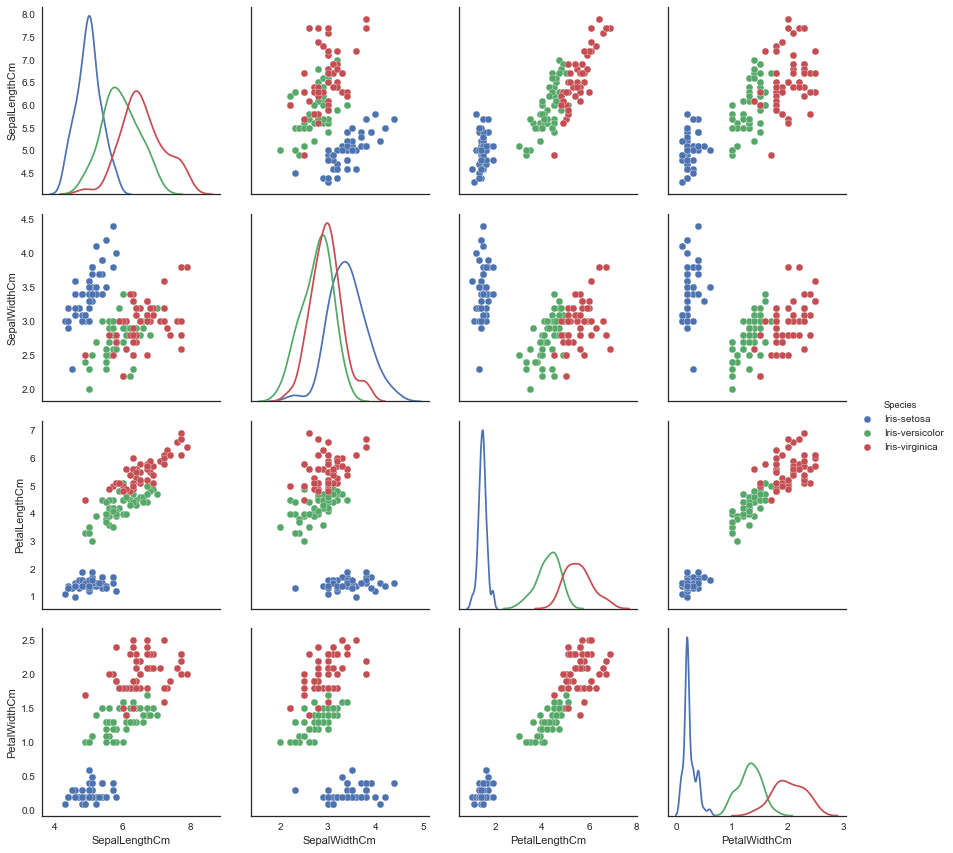

In [15]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

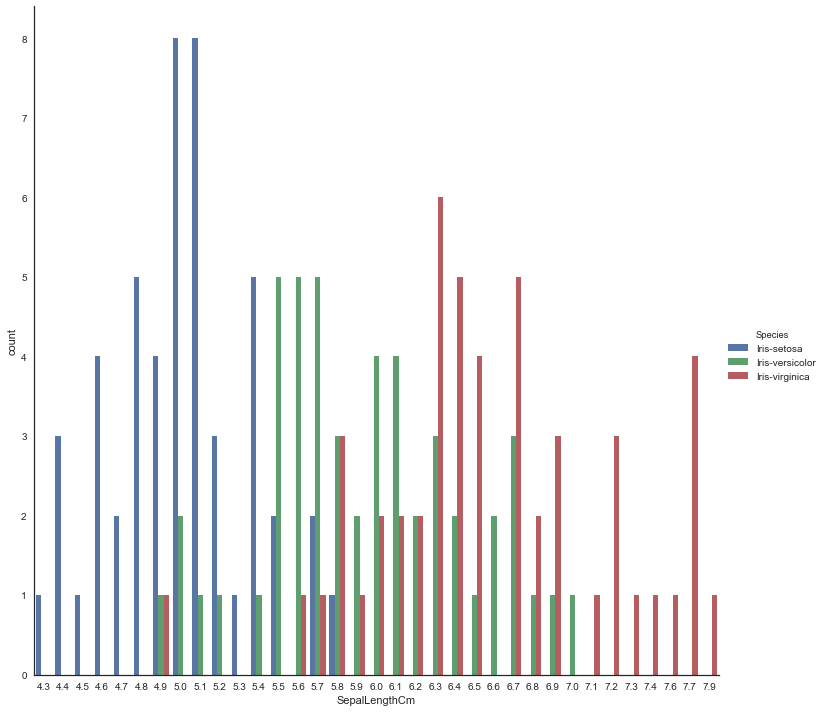

In [16]:
sns.factorplot('SepalLengthCm', data=iris, hue='Species', kind='count', size=10)

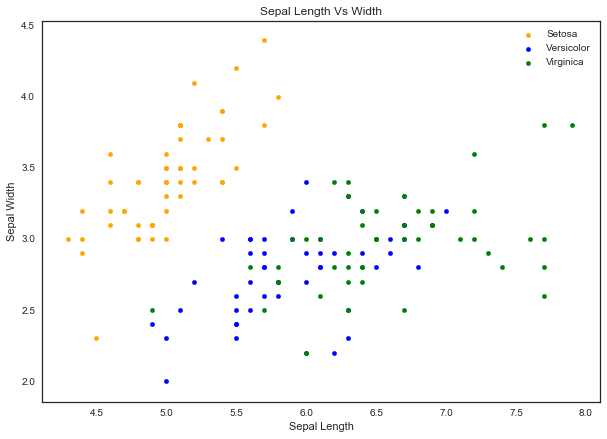

In [17]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

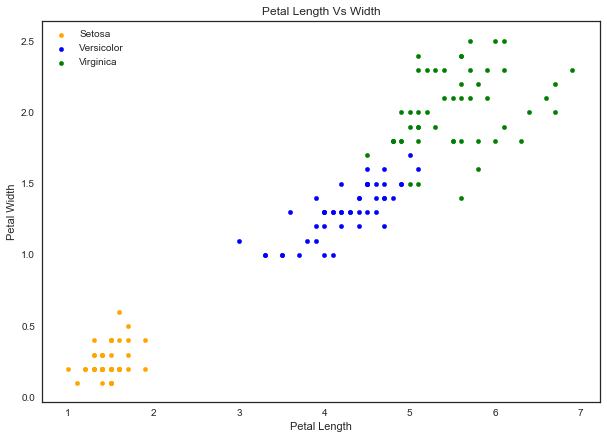

In [18]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

In [19]:
# Machine learning - Import all required package

# logistic regression model
from sklearn.linear_model import LogisticRegression 
# split data set
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
#SVM
from sklearn import svm
# accuracy of the model
from sklearn import metrics
# DTA
from sklearn.tree import DecisionTreeClassifier

In [27]:
iris.shape

(150, 5)

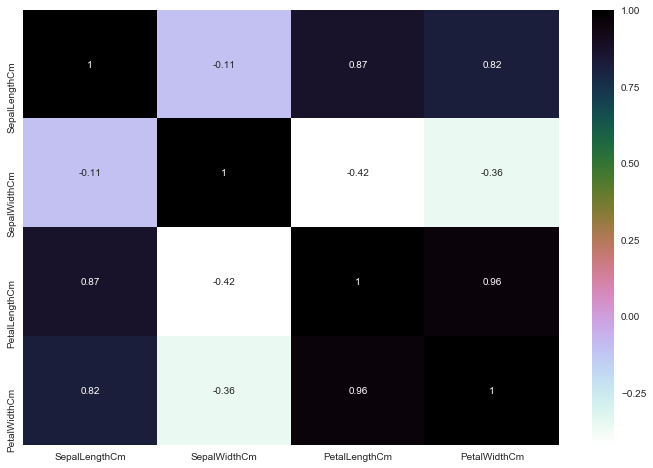

In [20]:
#drop id column to start analysis
iris.drop('Id', axis=1, inplace=True)

# create a hitmap to see correlations
plt.figure(figsize=(12, 8))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [29]:
iris.shape

(150, 5)

In [36]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# split the data into train and test set
train, test = train_test_split(iris, test_size=0.3)

In [31]:
train.shape

(105, 5)

In [32]:
test.shape

(45, 5)

In [37]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [39]:
train_y.head()

63    Iris-versicolor
15        Iris-setosa
85    Iris-versicolor
42        Iris-setosa
64    Iris-versicolor
Name: Species, dtype: object

In [40]:
# logistic regression model
model = LogisticRegression()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9555555555555556


In [41]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9555555555555556


In [42]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9777777777777777


In [43]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9777777777777777


([<matplotlib.axis.XTick at 0xd16c9e8>,
 <a list of 9 Text xticklabel objects>)

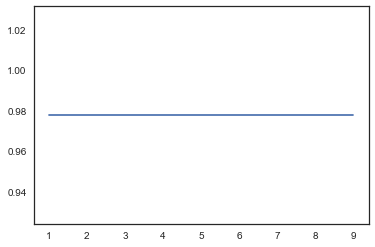

In [49]:
a_index = list(range(1,10))
a = pd.Series()
for i in list(range(1,10)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9]
plt.xticks(x)

In [50]:
#Creating Petals And Sepals Training Data
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [51]:
#For Iris Petal
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

In [52]:
#For Iris Sepal
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

In [54]:
#Logistic Regression Model
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction, test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


In [55]:
#SVM 
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


In [56]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [57]:
#K-NN
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
